Stock Prediction Model with N225 -  20 Year

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
# Loading N225 Index historical pricing from research paper 10/5/01 to 10/4/21
VTI = pd.read_csv('N225_20_year_dataset.csv')
VTI.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,10/5/2001,10165.450200,10261.86035,10039.50977,10205.870120,10205.870120,0.0
1,10/8/2001,NaN,NaN,NaN,NaN,NaN,NaN
2,10/9/2001,10143.389650,10143.38965,10011.76953,10011.769530,10011.769530,0.0
3,10/10/2001,9995.429688,10030.21973,9934.00000,9964.879883,9964.879883,0.0
4,10/11/2001,10074.509770,10347.00977,10052.08008,10347.009770,10347.009770,0.0


In [3]:
#overview of the data
VTI.info()
VTI.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4994 entries, 0 to 4993
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4994 non-null   object 
 1   Open       4894 non-null   float64
 2   High       4894 non-null   float64
 3   Low        4894 non-null   float64
 4   Close      4894 non-null   float64
 5   Adj Close  4894 non-null   float64
 6   Volume     4894 non-null   float64
dtypes: float64(6), object(1)
memory usage: 273.2+ KB


,Open,High,Low,Close,Adj Close,Volume
count,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4.894000e+03
mean,15125.739767,15215.469365,15028.445189,15123.015603,15123.015603,1.138322e+08
std,5458.660829,5476.381024,5439.185322,5460.032772,5460.032772,5.590171e+07
min,7059.770020,7100.770020,6994.899902,7054.979980,7054.979980,0.000000e+00
25%,10325.380372,10378.042722,10251.149900,10317.187255,10317.187255,7.430000e+07
50%,14492.134770,14572.035155,14392.859865,14471.669925,14471.669925,1.116000e+08
75%,19282.047855,19378.712400,19164.814458,19286.867190,19286.867190,1.442000e+08
max,30606.150390,30795.779300,30504.810550,30670.099610,30670.099610,5.952000e+08


In [4]:
#date range of the data
VTI['Date'] = pd.to_datetime(VTI['Date'])
print(f'Dataframe contains stock prices between {VTI.Date.min()} {VTI.Date.max()}') 
print(f'Total days = {(VTI.Date.max()  - VTI.Date.min()).days} days')

Dataframe contains stock prices between 2001-10-05 00:00:00 2021-10-04 00:00:00
Total days = 7304 days


In [5]:
# Plotting Historical performance of the ETF
layout = go.Layout(
    title='N225 Index Price',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Japanese Yen',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

VTI_data = [{'x':VTI['Date'], 'y':VTI['Close']}]
plot = go.Figure(data=VTI_data, layout=layout)


iplot(plot)

In [6]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape

In [7]:
#Split the data into train and test sets
VTI = VTI.dropna()
X = np.array(VTI.index).reshape(-1,1)
Y = VTI['Adj Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [8]:
# Feature scaling
scaler = StandardScaler().fit(X_train)

In [9]:
# First Model - Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)

#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
VTI_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=VTI_data, layout=layout)

iplot(plot2)

In [10]:
#Calculate scores for model evaluation
import math 
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'RMSE'.ljust(10)}{np.sqrt(mse(Y_train, lm.predict(X_train)))}\t{np.sqrt(mse(Y_test, lm.predict(X_test)))}
{'MAPE'.ljust(10)}{mape(Y_train, lm.predict(X_train))}\t{mape(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
RMSE      3555.0742898212297	3469.359061885587
MAPE      0.22610797153596962	0.2224512678165712



In [11]:
# Second Model - Logistic Regression
from sklearn.linear_model import LogisticRegression

#To avoid "continuous" error for Logistic Regression and KNN, convert data
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(Y_train)

clf = LogisticRegression()
clf.fit(X_train, training_scores_encoded)


#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = clf.predict(X_train).T,
    mode = 'markers',
    name = 'Predicted'
)
VTI_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=VTI_data, layout=layout)

iplot(plot2)




C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [12]:
#Calculate scores for model evaluation
import math 
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'RMSE'.ljust(10)}{np.sqrt(mse(Y_train, clf.predict(X_train)))}\t{np.sqrt(mse(Y_test, clf.predict(X_test)))}
{'MAPE'.ljust(10)}{mape(Y_train, clf.predict(X_train))}\t{mape(Y_test, clf.predict(X_test))}
'''
print(scores)




Metric           Train                Test        
RMSE      13196.464006033373	13119.58017180189
MAPE      0.7659251874314575	0.7658773816760651



In [13]:
# Third Modal - KNN
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, classification_report
#%%time

#warnings.filterwarnings('ignore')

# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid = {'n_neighbors': np.arange(1,50), 'p': [1, 2, 10, 50, 100, 500, 1000], 
              'weights': ["uniform", "distance"]}

knn_clf = KNeighborsClassifier()

knn_cv = GridSearchCV(knn_clf, param_grid, scoring='f1', cv=2, verbose=3, n_jobs=-1)
knn_cv.fit(X_train, training_scores_encoded)


params_optimal_knn = knn_cv.best_params_

knn = KNeighborsClassifier(**params_optimal_knn)

knn.fit(X_train, training_scores_encoded)

y_train_predicted = knn.predict(X_train)

#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = knn.predict(X_train).T,
    mode = 'markers',
    name = 'Predicted'
)
VTI_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=VTI_data, layout=layout)

iplot(plot2)



Fitting 2 folds for each of 686 candidates, totalling 1372 fits


C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=2.

C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan

In [14]:
#Calculate scores for model evaluation
import math 
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'RMSE'.ljust(10)}{np.sqrt(mse(Y_train, knn.predict(X_train)))}\t{np.sqrt(mse(Y_test, knn.predict(X_test)))}
{'MAPE'.ljust(10)}{mape(Y_train, knn.predict(X_train))}\t{mape(Y_test, knn.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
RMSE      13887.940708146785	13826.027213116931
MAPE      0.8822786803105528	0.8819876363599539



In [15]:
# Fourth Model - Gaussian NB

#%%time

#warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB, MultinomialNB
param_grid = {'var_smoothing': [0.001, 0.01, 0.1, 1.0]}

gnb = GaussianNB()

gnb = GridSearchCV(gnb, param_grid, scoring='accuracy', cv=2, verbose=1, n_jobs=-1)
gnb.fit(X_train, training_scores_encoded)

params_optimal = gnb.best_params_

gaussianNB_clf = GaussianNB(**params_optimal)

gaussianNB_clf.fit(X_train, training_scores_encoded) 

y_test_predicted = gaussianNB_clf.predict(X_test)

#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = gaussianNB_clf.predict(X_train).T,
    mode = 'markers',
    name = 'Predicted'
)
VTI_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=VTI_data, layout=layout)

iplot(plot2)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=2.



In [16]:
#Calculate scores for model evaluation
import math 
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'RMSE'.ljust(10)}{np.sqrt(mse(Y_train, gaussianNB_clf.predict(X_train)))}\t{np.sqrt(mse(Y_test, gaussianNB_clf.predict(X_test)))}
{'MAPE'.ljust(10)}{mape(Y_train, gaussianNB_clf.predict(X_train))}\t{mape(Y_test, gaussianNB_clf.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
RMSE      13887.959664077089	13840.026205704347
MAPE      0.8822794364970676	0.8832711368331599



In [17]:
#5th Model LSTM

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

data = pd.read_csv('N225_20_year_dataset.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,10/5/2001,10165.450200,10261.86035,10039.50977,10205.870120,10205.870120,0.0
1,10/8/2001,NaN,NaN,NaN,NaN,NaN,NaN
2,10/9/2001,10143.389650,10143.38965,10011.76953,10011.769530,10011.769530,0.0
3,10/10/2001,9995.429688,10030.21973,9934.00000,9964.879883,9964.879883,0.0
4,10/11/2001,10074.509770,10347.00977,10052.08008,10347.009770,10347.009770,0.0


In [18]:
data["Adj Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4894 entries, 0 to 4993
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4894 non-null   object 
 1   Open       4894 non-null   float64
 2   High       4894 non-null   float64
 3   Low        4894 non-null   float64
 4   Close      4894 non-null   float64
 5   Adj Close  4894 non-null   float64
 6   Volume     4894 non-null   float64
dtypes: float64(6), object(1)
memory usage: 305.9+ KB


In [19]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(4894, 1)

In [20]:
X_train = []
y_train = []

for i in range (60,4894): #60 : timestep // 604 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [21]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(4834, 60, 1)

In [22]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [23]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
152/152 - 41s - loss: 0.0056 - 41s/epoch - 268ms/step
Epoch 2/20
152/152 - 36s - loss: 0.0018 - 36s/epoch - 237ms/step
Epoch 3/20
152/152 - 35s - loss: 0.0017 - 35s/epoch - 233ms/step
Epoch 4/20
152/152 - 36s - loss: 0.0017 - 36s/epoch - 235ms/step
Epoch 5/20
152/152 - 37s - loss: 0.0014 - 37s/epoch - 241ms/step
Epoch 6/20
152/152 - 36s - loss: 0.0013 - 36s/epoch - 236ms/step
Epoch 7/20
152/152 - 33s - loss: 0.0010 - 33s/epoch - 215ms/step
Epoch 8/20
152/152 - 26s - loss: 9.9879e-04 - 26s/epoch - 174ms/step
Epoch 9/20
152/152 - 22s - loss: 0.0011 - 22s/epoch - 143ms/step
Epoch 10/20
152/152 - 25s - loss: 9.9640e-04 - 25s/epoch - 165ms/step
Epoch 11/20
152/152 - 26s - loss: 0.0010 - 26s/epoch - 168ms/step
Epoch 12/20
152/152 - 25s - loss: 8.0407e-04 - 25s/epoch - 166ms/step
Epoch 13/20
152/152 - 25s - loss: 7.7316e-04 - 25s/epoch - 166ms/step
Epoch 14/20
152/152 - 23s - loss: 9.6332e-04 - 23s/epoch - 150ms/step
Epoch 15/20
152/152 - 25s - loss: 8.6310e-04 - 25s/epoch - 167ms/

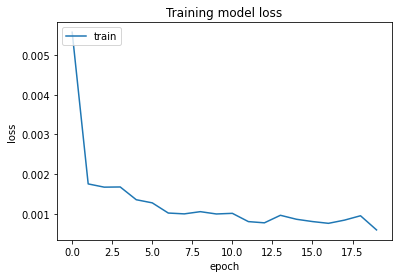

In [24]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [25]:
testData = pd.read_csv('N225_20_year_dataset_test_set.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(317, 60, 1)

In [26]:
y_pred = model.predict(X_test)
y_pred

10/10 [==============================] - 1s 29ms/step


array([[0.88303274],
       [0.8846142 ],
       [0.8869397 ],
       [0.8905144 ],
       [0.8900234 ],
       [0.88524634],
       [0.87724155],
       [0.8715485 ],
       [0.8685517 ],
       [0.86576605],
       [0.8637363 ],
       [0.8623764 ],
       [0.8575512 ],
       [0.8513996 ],
       [0.8448399 ],
       [0.83952713],
       [0.8339074 ],
       [0.82764274],
       [0.81747967],
       [0.80785865],
       [0.8029817 ],
       [0.8034995 ],
       [0.80970633],
       [0.8171337 ],
       [0.82367665],
       [0.8271178 ],
       [0.82755554],
       [0.8275775 ],
       [0.82874244],
       [0.8276627 ],
       [0.8229446 ],
       [0.81922936],
       [0.81717414],
       [0.81595445],
       [0.81401753],
       [0.809046  ],
       [0.79968303],
       [0.79096997],
       [0.78595585],
       [0.7865103 ],
       [0.788736  ],
       [0.79117596],
       [0.79001606],
       [0.78159446],
       [0.7663707 ],
       [0.7487014 ],
       [0.7381206 ],
       [0.734

In [27]:
predicted_price = sc.inverse_transform(y_pred)

In [28]:
y_pred1 = model.predict(X_train)
y_pred1

152/152 [==============================] - 5s 30ms/step


array([[0.12884589],
       [0.13434902],
       [0.13762337],
       ...,
       [0.92621833],
       [0.9228201 ],
       [0.91407245]], dtype=float32)

In [29]:
predicted_price1 = sc.inverse_transform(y_pred1)
actual_price = sc.inverse_transform(y_train.reshape(-1, 1))

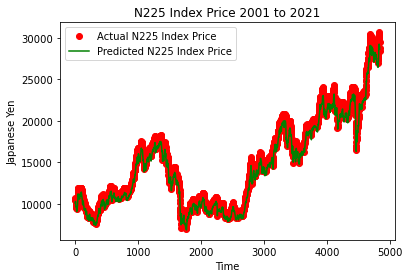

In [30]:
plt.plot(actual_price, 'o' , color = 'red', label = 'Actual N225 Index Price')
plt.plot(predicted_price1, color = 'green', label = 'Predicted N225 Index Price')
plt.title('N225 Index Price 2001 to 2021')
plt.xlabel('Time')
plt.ylabel('Japanese Yen')
plt.legend()
plt.show()

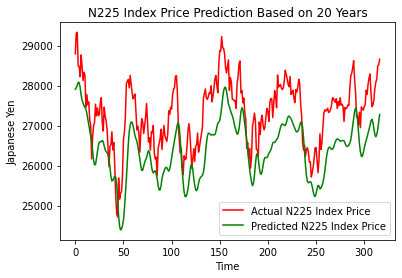

In [31]:
plt.plot(y_test, color = 'red', label = 'Actual N225 Index Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted N225 Index Price')
plt.title('N225 Index Price Prediction Based on 20 Years')
plt.xlabel('Time')
plt.ylabel('Japanese Yen')
plt.legend()
plt.show()

In [32]:
#Calculate scores for model evaluation
import math 
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'RMSE'.ljust(10)}{np.sqrt(mse(actual_price, predicted_price1))}\t{np.sqrt(mse(y_test, predicted_price))}
{'MAPE'.ljust(10)}{mape(actual_price, predicted_price1)}\t{mape(y_test, predicted_price)}
'''
print(scores)


Metric           Train                Test        
RMSE      709.1482682224748	999.1541442493458
MAPE      0.04264836361274813	0.03274122083652496

